In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/preprocessed_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,0.833333,0.062919,1.0,1.0,0.6,1.00,0.8,0.8,0.75,1.0,1.00,1.0,1.00,1.0,1.00,0.8,0.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.628205,0.015831,1.0,1.0,1.0,1.00,1.0,0.8,0.75,1.0,1.00,1.0,0.75,1.0,1.00,0.8,0.0,0.001563,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.192308,0.164603,0.6,0.4,0.8,0.25,0.6,0.6,0.50,0.6,0.75,0.6,0.75,0.5,0.75,0.6,0.0,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.628205,0.142886,0.4,0.6,0.4,0.50,0.4,0.4,0.25,0.4,0.75,0.8,0.00,0.5,1.00,0.4,0.0,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.525641,0.070631,0.6,0.4,0.4,0.25,0.6,0.6,0.50,0.6,0.75,1.0,0.25,0.5,0.25,0.6,0.0,0.014063,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [5]:
X = data.drop('satisfaction', axis = 1)
y = data.satisfaction

In [6]:
X.shape

(20718, 27)

In [7]:
y.shape

(20718,)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# **Logistic Regression**

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression(C = 0.2, solver = 'liblinear', random_state = 42)

In [11]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.2, random_state=42, solver='liblinear')

In [12]:
lr.score(X_train, y_train)

0.8742005550862797

In [13]:
lr.score(X_test, y_test)

0.8737934362934363

In [14]:
lr.n_iter_

array([6], dtype=int32)

In [15]:
lr.coef_

array([[-0.68100103, -0.19764224,  1.91475609, -0.64358697, -0.75865387,
         0.10166894, -0.13435261,  2.95621426,  0.29996038,  0.2916794 ,
         1.01109141,  1.0544179 ,  0.5260376 ,  1.29541482,  0.55708135,
         0.95831399, -1.21098088, -1.44602159, -1.33253229, -1.24666826,
        -0.31491716, -2.26428339,  0.00808847, -2.58728902, -0.28181287,
        -1.10803886, -1.18934882]])

In [16]:
lr.intercept_

array([-2.57920055])

In [17]:
lr.predict(X_test.iloc[:1])

array([1.])

In [18]:
lr.predict_proba(X_test.iloc[:1])

array([[0.12509419, 0.87490581]])

In [19]:
lr.decision_function(X_test[:1])

array([1.94504925])

## **Metrics**

In [20]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, roc_curve, roc_auc_score

In [21]:
y_pred = lr.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.8737934362934363

In [23]:
precision_score(y_test, y_pred)

0.8696151636990236

In [24]:
recall_score(y_test, y_pred)

0.8364640883977901

In [25]:
f1_score(y_test, y_pred)

0.8527175443537033

In [26]:
confusion_matrix(y_test, y_pred)

array([[2107,  227],
       [ 296, 1514]])

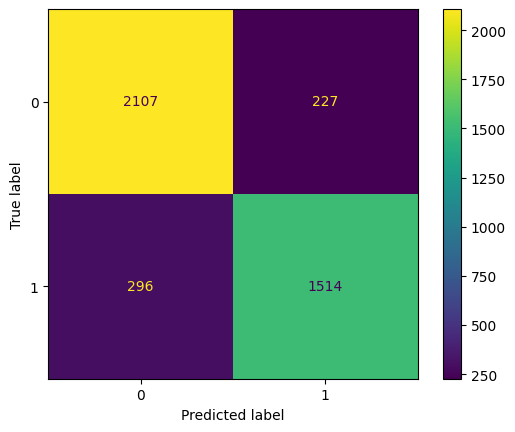

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();

#### **ROC CURVE**

In [28]:
y_scores = lr.predict_proba(X_test)

In [29]:
roc_auc_score(y_test, y_scores[:,1])

0.9247439957959921

In [30]:
fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])

In [31]:
threshold.shape

(802,)

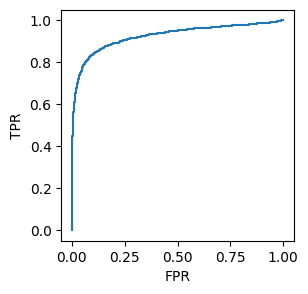

In [32]:
plt.figure(figsize = (3,3))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

#### **Precision Recall Curve**

In [33]:
from sklearn.metrics import precision_recall_curve

In [34]:
p, r, t = precision_recall_curve(y_test, y_scores[:,1])

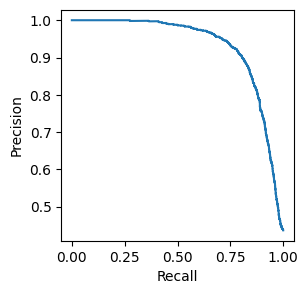

In [35]:
plt.figure(figsize = (3,3))
plt.plot(r,p)
plt.xlabel('Recall')
plt.ylabel('Precision');

## **Hyperparameter tuning**

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'C': [0.1, 0.5, 1, 2],
        'solver': ['sag', 'liblinear']
    }
]

gs = GridSearchCV(LogisticRegression(random_state = 42), param_grid = param_grid, cv = 3)

gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': [0.1, 0.5, 1, 2],
                          'solver': ['sag', 'liblinear']}])

In [37]:
gs.best_params_

{'C': 0.5, 'solver': 'sag'}

In [38]:
gs.best_score_

0.8745625341987738

In [39]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.109235,0.024257,0.003449,0.000217,0.1,sag,"{'C': 0.1, 'solver': 'sag'}",0.869502,0.879819,0.874185,0.874502,0.004218,2
1,0.060504,0.014968,0.003563,0.000054,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.867330,0.879819,0.875453,0.874201,0.005175,4
2,0.202540,0.002675,0.005371,0.002112,0.5,sag,"{'C': 0.5, 'solver': 'sag'}",0.868416,0.881267,0.874004,0.874563,0.005261,1
3,0.078751,0.011881,0.003757,0.000195,0.5,liblinear,"{'C': 0.5, 'solver': 'liblinear'}",0.867873,0.881267,0.874004,0.874382,0.005474,3
4,0.322166,0.011895,0.003621,0.000475,1,sag,"{'C': 1, 'solver': 'sag'}",0.868778,0.880724,0.872556,0.874019,0.004985,6
5,0.072639,0.001126,0.003909,0.000245,1,liblinear,"{'C': 1, 'solver': 'liblinear'}",0.868778,0.880543,0.873099,0.874140,0.004859,5
6,0.404972,0.006041,0.003786,0.000452,2,sag,"{'C': 2, 'solver': 'sag'}",0.868597,0.880362,0.872375,0.873778,0.004904,7
7,0.072841,0.001917,0.004883,0.001555,2,liblinear,"{'C': 2, 'solver': 'liblinear'}",0.868235,0.880000,0.872375,0.873537,0.004873,8


# **SGDClassifier**

In [40]:
from sklearn.linear_model import SGDClassifier

In [41]:
sgd = SGDClassifier(loss = 'log_loss', random_state = 42)

In [42]:
sgd.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [43]:
sgd.score(X_test, y_test)

0.8742760617760618

In [44]:
y_pred1 = sgd.predict(X_test)

In [45]:
precision_score(y_test, y_pred1)

0.8838594401429423

In [46]:
recall_score(y_test, y_pred1)

0.8198895027624309

In [47]:
f1_score(y_test, y_pred1)

0.8506735454284895

# **Perceptron**

In [48]:
from sklearn.linear_model import Perceptron

In [49]:
per = Perceptron(tol = 1e-4, random_state = 42)

In [50]:
per.fit(X_train, y_train)

Perceptron(random_state=42, tol=0.0001)

In [51]:
per.score(X_train, y_train)

0.8007722939543864

In [52]:
per.score(X_test, y_test)

0.7948841698841699

In [53]:
per.n_iter_

7

In [54]:
per.t_  # How many data points model has seen during updation

116019.0

In [55]:
per.coef_

array([[ -2.56410256,  -2.95717475,   6.8       ,  -4.2       ,
         -4.        ,   1.5       ,  -0.6       ,   9.4       ,
          3.75      ,   1.2       ,   2.25      ,   2.4       ,
          2.75      ,   4.5       ,   4.25      ,   5.        ,
        -10.74099617, -17.025     ,  -8.        ,  -4.        ,
         -1.        , -11.        ,  -1.        , -11.        ,
         -3.        ,  -2.        ,  -7.        ]])

In [56]:
per.intercept_

array([-12.])

In [57]:
clf = Perceptron(warm_start = True, max_iter = 1, random_state = 42)

total_loss = []
for i in range(10):
  clf.fit(X_train, y_train)
  y_train_pred = clf.predict(X_train)
  loss = np.sum(y_train_pred != y_train)
  total_loss.append(loss)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

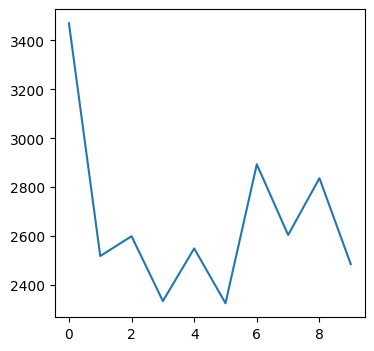

In [58]:
plt.figure(figsize = (4,4))
plt.plot(range(10), total_loss);

# **KNeighborsClassifier**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knc = KNeighborsClassifier(n_neighbors = 7)

In [61]:
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [62]:
knc.score(X_test, y_test)

0.9109555984555985

In [63]:
knc.score(X_train, y_train)

0.9284421382888862

In [64]:
knc.kneighbors(X[:1]) # distances and indices of k nearest datapoints

(array([[0.        , 0.49209927, 0.4992207 , 0.50054834, 0.52787053,
         0.52805274, 0.54156171]]),
 array([[   44,  3771,  8050,  2199,  9557, 10846,  7326]]))

# **Naive Bayes**

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gnb = GaussianNB()

In [67]:
gnb.fit(X_train, y_train)

GaussianNB()

In [68]:
gnb.score(X_train, y_train)

0.8478339567998069

In [69]:
gnb.score(X_test, y_test)

0.8477316602316602

In [70]:
gnb.class_prior_

array([0.57125618, 0.42874382])

In [71]:
gnb.theta_ # mean

array([[0.39059369, 0.17807505, 0.48100972, 0.62672159, 0.51375158,
        0.49659379, 0.58926912, 0.53394592, 0.50591466, 0.57661597,
        0.50171631, 0.59835234, 0.58998733, 0.50596747, 0.59550591,
        0.58441065, 0.01291133, 0.0137199 , 0.51742712, 0.48257288,
        0.75654837, 0.24345163, 0.51024504, 0.48975496, 0.25929447,
        0.64902831, 0.09167723],
       [0.44407759, 0.29339756, 0.63034056, 0.59014917, 0.60045032,
        0.49377287, 0.70166057, 0.80951309, 0.7402899 , 0.78893892,
        0.70721925, 0.76298902, 0.74141571, 0.66331269, 0.74116943,
        0.74728399, 0.00944116, 0.00955662, 0.49774838, 0.50225162,
        0.898255  , 0.101745  , 0.92977765, 0.07022235, 0.76555024,
        0.19448354, 0.03996623]])

In [72]:
gnb.var_

array([[0.04463407, 0.02614462, 0.03762416, 0.08918456, 0.05880963,
        0.08867529, 0.07252532, 0.05250631, 0.10609884, 0.06951233,
        0.103497  , 0.06799053, 0.08756662, 0.10356335, 0.08643074,
        0.07074134, 0.00090801, 0.00098282, 0.2496963 , 0.2496963 ,
        0.18418293, 0.18418293, 0.24989504, 0.24989504, 0.19206085,
        0.22779056, 0.08327251],
       [0.02635079, 0.0512891 , 0.10088637, 0.09556297, 0.09905975,
        0.11686067, 0.06130037, 0.05541189, 0.0818611 , 0.04780898,
        0.08179632, 0.05542163, 0.07588325, 0.08179364, 0.07488508,
        0.05240256, 0.00078645, 0.00083309, 0.24999493, 0.24999493,
        0.09139296, 0.09139296, 0.06529117, 0.06529117, 0.17948307,
        0.15665969, 0.03836893]])

# **Decision Tree Classifier**

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [74]:
dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.01, random_state = 42)

In [75]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', random_state=42)

In [76]:
dt.score(X_train, y_train)

0.8983950766260408

In [77]:
dt.score(X_test, y_test)

0.8991312741312741

In [78]:
dt.get_depth()

6

In [79]:
dt.get_n_leaves()

13

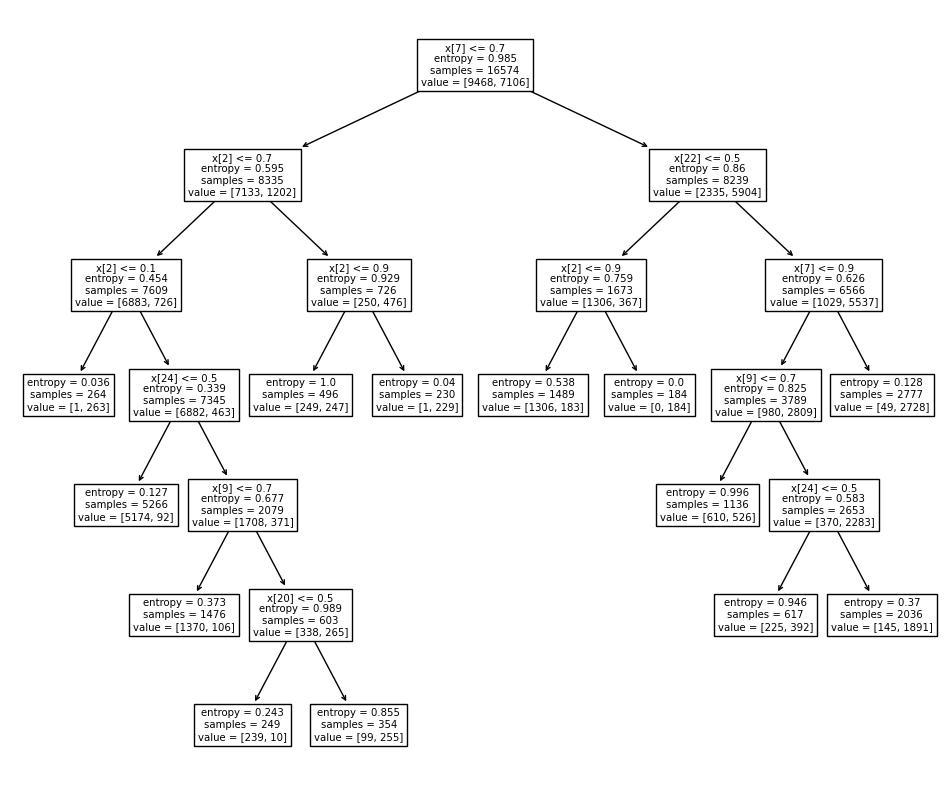

In [80]:
plt.figure(figsize = (12,10))
plot_tree(dt);

In [92]:
dt.feature_importances_

array([0.        , 0.        , 0.22836194, 0.        , 0.        ,
       0.        , 0.        , 0.46346669, 0.        , 0.06666127,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02200534, 0.        , 0.1605641 , 0.        , 0.05894067,
       0.        , 0.        ])

In [81]:
dt.tree_.node_count

25

In [82]:
dt.tree_.impurity

array([0.9852996 , 0.59516208, 0.45428522, 0.03592558, 0.33938094,
       0.12699264, 0.67667705, 0.37266331, 0.98940206, 0.24302825,
       0.85498851, 0.92892308, 0.99998827, 0.04036976, 0.86005324,
       0.75900889, 0.53764339, 0.        , 0.62639599, 0.8246924 ,
       0.99605231, 0.58283534, 0.94648968, 0.37045291, 0.1280051 ])

In [83]:
dt.tree_.n_node_samples

array([16574,  8335,  7609,   264,  7345,  5266,  2079,  1476,   603,
         249,   354,   726,   496,   230,  8239,  1673,  1489,   184,
        6566,  3789,  1136,  2653,   617,  2036,  2777], dtype=int64)

In [84]:
dt.tree_.value

array([[[9.468e+03, 7.106e+03]],

       [[7.133e+03, 1.202e+03]],

       [[6.883e+03, 7.260e+02]],

       [[1.000e+00, 2.630e+02]],

       [[6.882e+03, 4.630e+02]],

       [[5.174e+03, 9.200e+01]],

       [[1.708e+03, 3.710e+02]],

       [[1.370e+03, 1.060e+02]],

       [[3.380e+02, 2.650e+02]],

       [[2.390e+02, 1.000e+01]],

       [[9.900e+01, 2.550e+02]],

       [[2.500e+02, 4.760e+02]],

       [[2.490e+02, 2.470e+02]],

       [[1.000e+00, 2.290e+02]],

       [[2.335e+03, 5.904e+03]],

       [[1.306e+03, 3.670e+02]],

       [[1.306e+03, 1.830e+02]],

       [[0.000e+00, 1.840e+02]],

       [[1.029e+03, 5.537e+03]],

       [[9.800e+02, 2.809e+03]],

       [[6.100e+02, 5.260e+02]],

       [[3.700e+02, 2.283e+03]],

       [[2.250e+02, 3.920e+02]],

       [[1.450e+02, 1.891e+03]],

       [[4.900e+01, 2.728e+03]]])

In [85]:
dt.tree_.threshold

array([ 0.70000002,  0.70000002,  0.1       , -2.        ,  0.5       ,
       -2.        ,  0.70000002, -2.        ,  0.5       , -2.        ,
       -2.        ,  0.90000001, -2.        , -2.        ,  0.5       ,
        0.90000001, -2.        , -2.        ,  0.90000001,  0.70000002,
       -2.        ,  0.5       , -2.        , -2.        , -2.        ])

# **VotingCLassifier**

In [86]:
from sklearn.ensemble import VotingClassifier

In [87]:
c1 = DecisionTreeClassifier(random_state = 42)
c2 = GaussianNB()
c3 = KNeighborsClassifier(n_neighbors = 7)

In [88]:
vote = VotingClassifier(estimators = [('dt',c1), ('gnb',c2), ('knn',c3)], voting = 'hard')

vote.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('gnb', GaussianNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=7))])

In [89]:
vote.score(X_train, y_train)

0.9434656691203089

In [90]:
vote.score(X_test, y_test)

0.9148166023166023

# **PCA**

In [91]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [93]:
pipe = Pipeline([
    ('dim_red', PCA(n_components = 0.9)),
    ('estimator', KNeighborsClassifier(n_neighbors = 5))
])

In [94]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('dim_red', PCA(n_components=0.9)),
                ('estimator', KNeighborsClassifier())])

In [95]:
pipe.score(X_test, y_test)

0.9049227799227799

In [96]:
pipe.score(X_train, y_train)

0.926330397007361

# **Bagging Classifier**

In [97]:
from sklearn.ensemble import BaggingClassifier

In [98]:
bc = BaggingClassifier(estimator = KNeighborsClassifier(n_neighbors=7), n_estimators = 20, random_state = 42)

bc.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=7),
                  n_estimators=20, random_state=42)

In [100]:
bc.score(X_train, y_train)

0.9307952214311572

In [111]:
# To check the kneighbors of the first model trained in bag

print(bc.estimators_[0].kneighbors(X_test[:1]))

(array([[0.32964821, 0.39142084, 0.39142084, 0.4107701 , 0.4107701 ,
        0.45837507, 0.50264357]]), array([[11947, 16068, 12173,  9404,  5690,   807,  6850]]))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [102]:
bag = BaggingClassifier(estimator = DecisionTreeClassifier(random_state = 42), random_state = 42)

param_grid = [{
    'max_samples': [0.5, 0.8],
    'n_estimators': [5,10,15,20],
    'estimator__max_depth': [10,12,20]
}]

gs = GridSearchCV(bag, param_grid, cv = 3, scoring = 'f1', n_jobs = -1)

gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid=[{'estimator__max_depth': [10, 12, 20],
                          'max_samples': [0.5, 0.8],
                          'n_estimators': [5, 10, 15, 20]}],
             scoring='f1')

In [103]:
gs.best_params_

{'estimator__max_depth': 12, 'max_samples': 0.8, 'n_estimators': 20}

In [104]:
gs.best_score_

0.937977846044669

In [105]:
gs.score(X_test, y_test)

0.9429378531073446

# **RandomForestClassifier**

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth = 10, random_state = 42)

In [114]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=42)

In [115]:
rfc.score(X_train, y_train)

0.9583685290213587

In [116]:
rfc.score(X_test, y_test)

0.9435328185328186

# **AdaBoostClassifier**

In [117]:
from sklearn.ensemble import AdaBoostClassifier

In [118]:
abc = AdaBoostClassifier(n_estimators = 10, random_state = 42)

In [119]:
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [120]:
abc.score(X_train, y_train)

0.8909738144081091

In [121]:
abc.score(X_test, y_test)

0.8841698841698842

# **SVM**

In [122]:
from sklearn.svm import SVC

In [123]:
svc = SVC(C = 1, kernel ='rbf', random_state = 42)

svc.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [124]:
svc.score(X_train, y_train)

0.9385784964402075

In [125]:
svc.score(X_test, y_test)

0.9336389961389961